IOU值： 0.6196482836879266


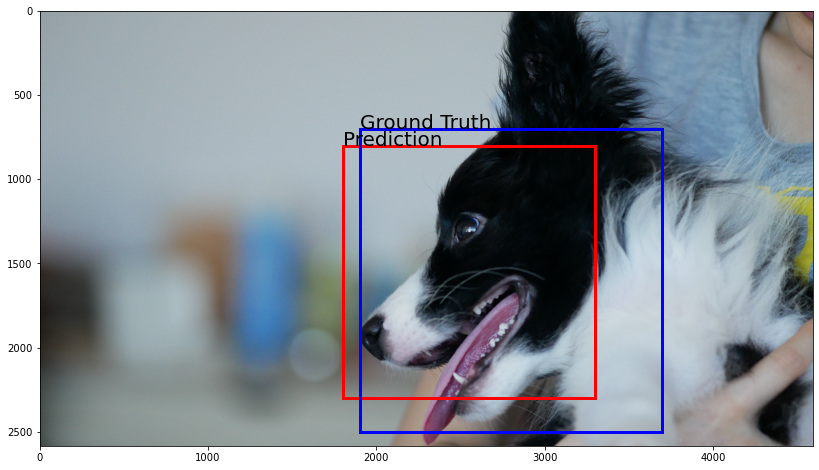

In [2]:
import cv2
import matplotlib.patches as patches
import matplotlib.pyplot as plt


# 導入照片
image = cv2.imread('Dog.JPG')

# 因為CV2會將照片讀成BGR，要轉回RGB
# img[..., [2, 1, 0]]
image = image[:, :, ::-1]
Ground_Truth_BBOX = [1900, 700, 1800, 1800]
Prediction_BBOX=[1800, 800, 1500, 1500]

# [X,Y,W,H] 轉換成 [X0,Y0,X1,Y1]
Ground_Truth_BBOX_Transform = [
    Ground_Truth_BBOX[0],
    Ground_Truth_BBOX[1],
    Ground_Truth_BBOX[0]+Ground_Truth_BBOX[2],
    Ground_Truth_BBOX[1]+Ground_Truth_BBOX[3]
]

Prediction_BBOX_Transform = [
    Prediction_BBOX[0],
    Prediction_BBOX[1],
    Prediction_BBOX[0]+Prediction_BBOX[2],
    Prediction_BBOX[1]+Prediction_BBOX[3]
]

plt.rcParams['figure.figsize'] = (15, 8)
fig, ax = plt.subplots(1)
ax.imshow(image)
# plt.show()

# 畫BBOX-Prediction
rect = patches.Rectangle(
    (Prediction_BBOX[0], Prediction_BBOX[1]),
    Prediction_BBOX[2],
    Prediction_BBOX[3],
    linewidth=3,
    edgecolor='r',
    facecolor='none',
)
ax.text(1800, 800, 'Prediction', size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle(
    (Ground_Truth_BBOX[0], Ground_Truth_BBOX[1]),
    Ground_Truth_BBOX[2],
    Ground_Truth_BBOX[3],
    linewidth=3,
    edgecolor='b',
    facecolor='none'
)
ax.text(1900, 700, 'Ground Truth', size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)
# plt.show()


# 定義IOU計算
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    # 找出比較大的X0, Y0,  比較小的X1, Y1
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # 計算交集區域
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # 計算各自的BBOX大小
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # 計算聯集區域
    unionArea = boxAArea + boxBArea - interArea

    # 計算IOU
    # 交集 / 聯集
    iou = interArea / unionArea
    # return the intersection over union value
    return iou


IOU = bb_intersection_over_union(Ground_Truth_BBOX_Transform, Prediction_BBOX_Transform)
# '''應該要得到0.6196482836879266'''
print('IOU值：', IOU)

